In [1]:
import pandas as pd 

In [2]:
sp500_companies = pd.read_csv('/Users/aamirpirani/Desktop/SP500_Datasets/SP500_Companies.csv')
sp500_companies.head()

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care


In [3]:
sp500_financial_information = pd.read_csv('/Users/aamirpirani/Desktop/SP500_Datasets/SP500_Financial_Info.csv')
sp500_financial_information.head()

PermissionError: [Errno 1] Operation not permitted: '/Users/aamirpirani/Desktop/SP500_Datasets/SP500_Financial_Info.csv'

In [4]:
sp500_index_data = pd.read_csv('/Users/aamirpirani/Desktop/SP500_Datasets/SP500_Index_Data.csv')
sp500_index_data.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [5]:
## Sector Distribution 

In [6]:
import matplotlib.pyplot as plt

In [7]:
sector_distribution = sp500_companies['Sector'].value_counts()

In [12]:
print(sector_distribution.head())

Sector
Industrials               74
Information Technology    74
Financials                65
Health Care               64
Consumer Discretionary    63
Name: count, dtype: int64


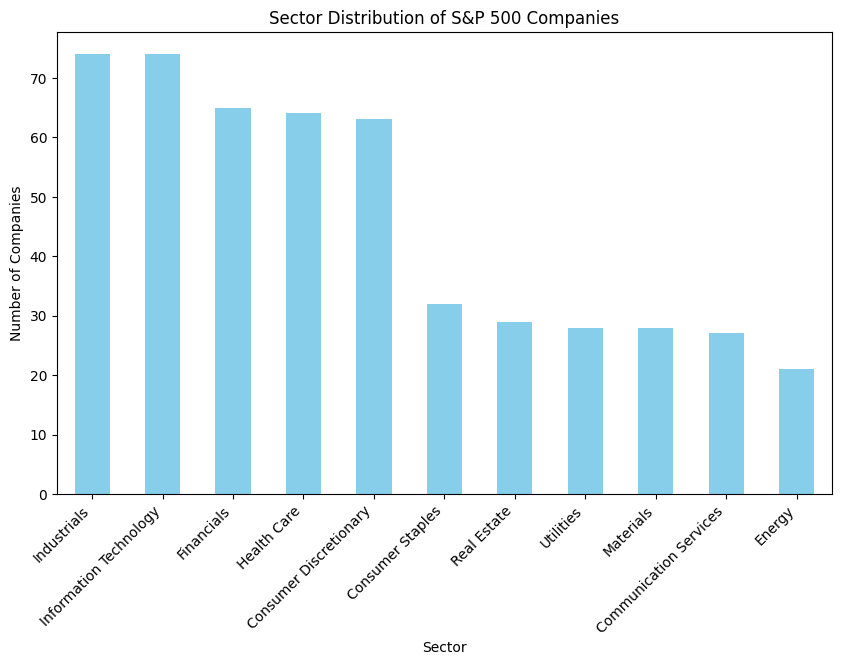

In [8]:
plt.figure(figsize=(10, 6))
sector_distribution.plot(kind='bar', color='skyblue')
plt.title('Sector Distribution of S&P 500 Companies')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
## Market Capitalization Analysis 

In [10]:
market_cap_stats = sp500_financial_information['Market Cap'].describe()

In [11]:
print(market_cap_stats.head())

count    5.050000e+02
mean     4.923944e+10
std      9.005017e+10
min      2.626102e+09
25%      1.273207e+10
Name: Market Cap, dtype: float64


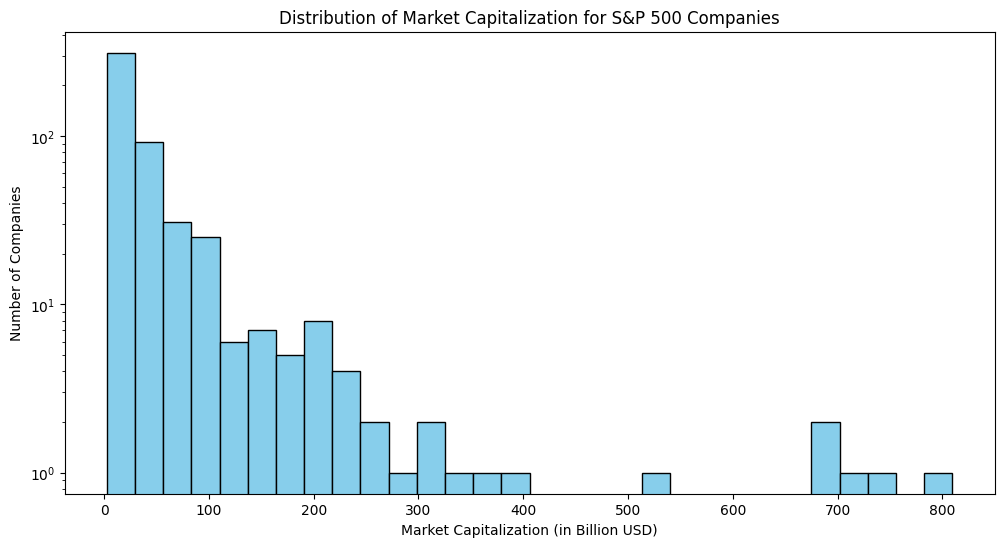

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_financial_information['Market Cap'] / 1e9, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Capitalization for S&P 500 Companies')
plt.xlabel('Market Capitalization (in Billion USD)')
plt.ylabel('Number of Companies')
plt.yscale('log') 
plt.show()

In [13]:
average_market_cap = market_cap_stats['mean'] / 1e9  
median_market_cap = market_cap_stats['50%'] / 1e9    
print(f'Average Market Capitalization: ${average_market_cap:.2f} Billion USD')
print(f'Median Market Capitalization: ${median_market_cap:.2f} Billion USD')

Average Market Capitalization: $49.24 Billion USD
Median Market Capitalization: $21.40 Billion USD


In [14]:
## Price and Earnings Analysis 

In [15]:
print(sp500_financial_information.columns)

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')


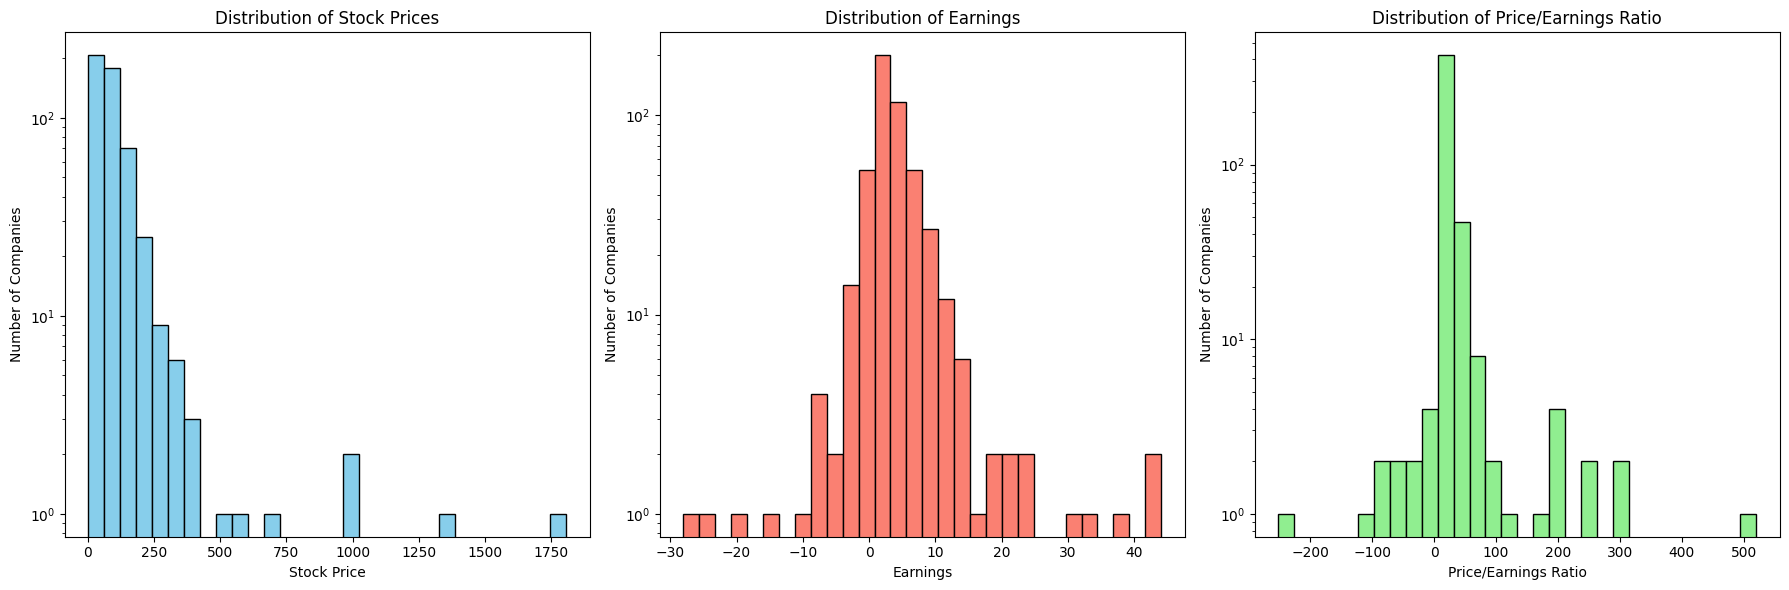

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].hist(sp500_financial_information['Price'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Stock Prices')
axes[0].set_xlabel('Stock Price')
axes[0].set_ylabel('Number of Companies')
axes[0].set_yscale('log')  

axes[1].hist(sp500_financial_information['Earnings/Share'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Earnings')
axes[1].set_xlabel('Earnings')
axes[1].set_ylabel('Number of Companies')
axes[1].set_yscale('log') 

axes[2].hist(sp500_financial_information['Price/Earnings'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Price/Earnings Ratio')
axes[2].set_xlabel('Price/Earnings Ratio')
axes[2].set_ylabel('Number of Companies')
axes[2].set_yscale('log')  

plt.tight_layout()
plt.show()

In [16]:
high_pe_ratio_companies = sp500_financial_information[sp500_financial_information['Price/Earnings'] > sp500_financial_information['Price/Earnings'].mean() + 2 * sp500_financial_information['Price/Earnings'].std()]
low_pe_ratio_companies = sp500_financial_information[sp500_financial_information['Price/Earnings'] < sp500_financial_information['Price/Earnings'].mean() - 2 * sp500_financial_information['Price/Earnings'].std()]

print("\nCompanies with High Price/Earnings Ratios:")
print(high_pe_ratio_companies[['Name', 'Price/Earnings']])

print("\nCompanies with Low Price/Earnings Ratios:")
print(low_pe_ratio_companies[['Name', 'Price/Earnings']])


Companies with High Price/Earnings Ratios:
                           Name  Price/Earnings
9    Advanced Micro Devices Inc          187.00
30               Amazon.com Inc          296.16
64   Baker Hughes, a GE Company          305.56
103      Charter Communications          162.92
171               EOG Resources          246.44
326                Netflix Inc.          200.08
346        Occidental Petroleum          195.63
366   Pioneer Natural Resources          118.29
403              Salesforce.com          520.15
404          SBA Communications          199.81
475  Vertex Pharmaceuticals Inc          252.67

Companies with Low Price/Earnings Ratios:
                            Name  Price/Earnings
49            Apache Corporation         -251.53
59                  Autodesk Inc          -77.07
101   CF Industries Holdings Inc          -59.46
245                       Incyte         -119.89
323  National Oilwell Varco Inc.          -77.71


In [17]:
## Dividend Yield Analysis 

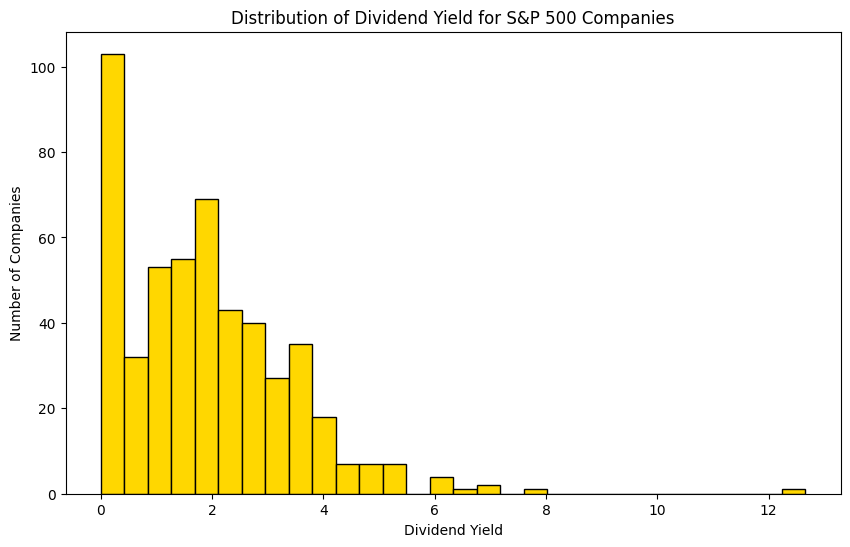

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(sp500_financial_information['Dividend Yield'], bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Dividend Yield for S&P 500 Companies')
plt.xlabel('Dividend Yield')
plt.ylabel('Number of Companies')
plt.show()

In [19]:
high_dividend_yield_companies = sp500_financial_information[sp500_financial_information['Dividend Yield'] > sp500_financial_information['Dividend Yield'].mean() + 2 * sp500_financial_information['Dividend Yield'].std()]

print("\nCompanies with High Dividend Yields:")
print(high_dividend_yield_companies[['Name', 'Dividend Yield']])


Companies with High Dividend Yields:
                           Name  Dividend Yield
58                     AT&T Inc        5.415651
99              CenturyLink Inc       12.661196
200                  Ford Motor        6.784387
226                    HCP Inc.        6.330197
248   Intercontinental Exchange        5.429864
257  Iron Mountain Incorporated        7.082580
269                Kimco Realty        7.713499
291                 Macy's Inc.        6.098546
348                       ONEOK        5.443620
370                   PPL Corp.        5.219689
389   Realty Income Corporation        5.372036
405                  SCANA Corp        6.683033
408          Seagate Technology        5.085772
413    Simon Property Group Inc        5.036808
417                Southern Co.        5.353023
471                  Ventas Inc        5.965641
486              Welltower Inc.        6.153846


In [20]:
## 52-Week High/Low Analysis 

In [21]:
sp500_financial_information['Temp'] = sp500_financial_information['52 Week High']
sp500_financial_information['52 Week High'] = sp500_financial_information['52 Week Low']
sp500_financial_information['52 Week Low'] = sp500_financial_information['Temp']
sp500_financial_information.drop('Temp', axis=1, inplace=True)

In [22]:
print("\nUpdated Structure of the Dataset:")
print(sp500_financial_information.head())


Updated Structure of the Dataset:
  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92      175.490        259.77  138721055226   
1        1.147959            1.70       48.925         68.39   10783419933   
2        1.908982            0.26       42.280         64.60  102121042306   
3        2.499560            3.29       60.050        125.86  181386347059   
4        1.714470            5.44      114.820        162.60   98765855553   

         

In [23]:
near_highs = sp500_financial_information[sp500_financial_information['Price'] >= 0.9 * sp500_financial_information['52 Week High']]
near_lows = sp500_financial_information[sp500_financial_information['Price'] <= 1.1 * sp500_financial_information['52 Week Low']]

In [24]:
print("\nCompanies Trading Near 52-Week Highs:")
print(near_highs[['Name', 'Price', '52 Week High', '52 Week Low']])


Companies Trading Near 52-Week Highs:
                     Name    Price  52 Week High  52 Week Low
4           Accenture plc   150.51        162.60      114.820
7       Adobe Systems Inc   185.16        204.45      114.451
11              Aetna Inc   178.00        194.40      119.510
13              AFLAC Inc    83.25         91.73       68.800
30         Amazon.com Inc  1350.50       1498.00      812.500
..                    ...      ...           ...          ...
473      Verisk Analytics    92.28        100.54       75.600
480       Wal-Mart Stores   100.02        109.98       66.890
493  Willis Towers Watson   152.36        165.00      120.869
500            Xylem Inc.    70.24         76.81       46.860
503         Zions Bancorp    50.71         55.61       38.430

[89 rows x 4 columns]


In [25]:
print("\nCompanies Trading Near 52-Week Lows:")
print(near_lows[['Name', 'Price', '52 Week High', '52 Week Low']])


Companies Trading Near 52-Week Lows:
                                    Name   Price  52 Week High  52 Week Low
6                      Acuity Brands Inc  145.41        225.36     142.0000
10                              AES Corp   10.06         12.05      10.0000
17                  Alaska Air Group Inc   64.04        101.43      59.2500
19   Alexandria Real Estate Equities Inc  114.58        134.37     106.8900
23                         Allergan, Plc  164.20        256.80     160.0700
..                                   ...     ...           ...          ...
490                   Weyerhaeuser Corp.   33.60         37.89      30.9504
491                      Whirlpool Corp.  164.95        202.99     158.8000
492                        Williams Cos.   28.56         33.67      26.8188
496                      Xcel Energy Inc   42.44         52.22      41.1600
502               Zimmer Biomet Holdings  115.53        133.49     108.1700

[150 rows x 4 columns]


In [26]:
correlation = sp500_financial_information[['Price', '52 Week High', '52 Week Low']].corr()

print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
                 Price  52 Week High  52 Week Low
Price         1.000000      0.995076     0.982787
52 Week High  0.995076      1.000000     0.984853
52 Week Low   0.982787      0.984853     1.000000


In [27]:
## Market Cap VS EBITDA 

In [28]:
import seaborn as sns

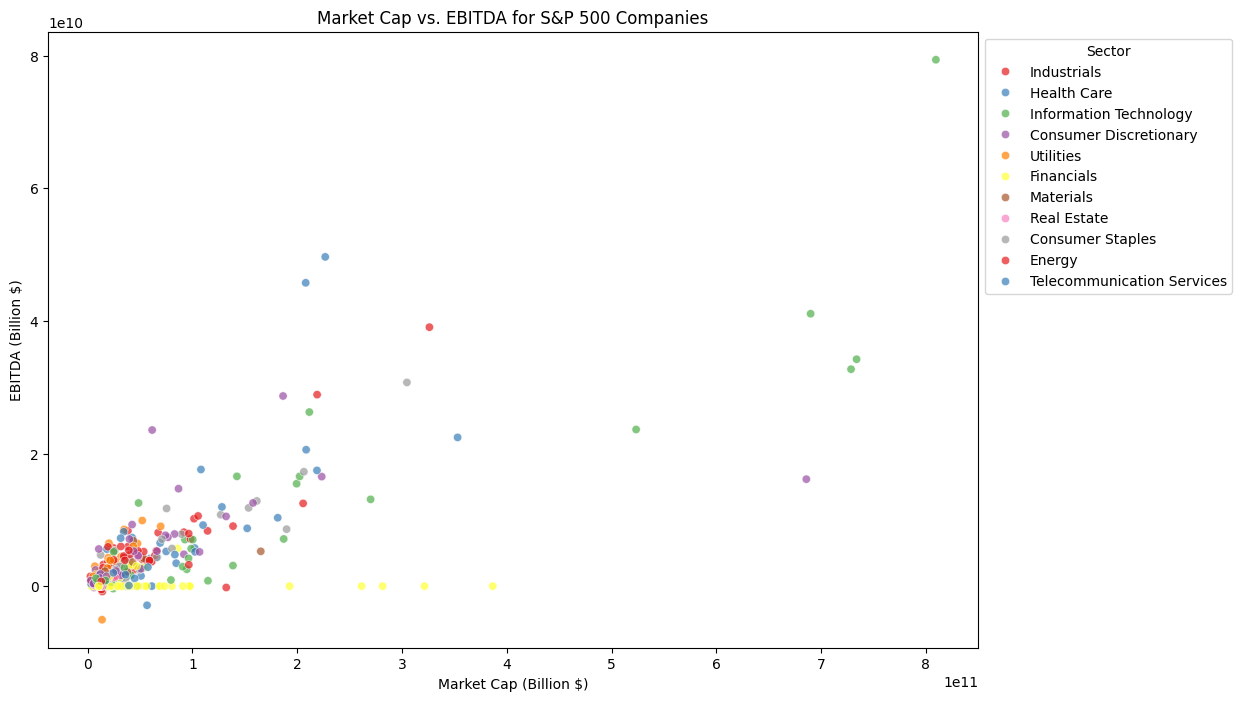

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Market Cap', y='EBITDA', data=sp500_financial_information, hue='Sector', palette='Set1', alpha=0.7)
plt.title('Market Cap vs. EBITDA for S&P 500 Companies')
plt.xlabel('Market Cap (Billion $)')
plt.ylabel('EBITDA (Billion $)')
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
## Historical S&P 500 Performance 

In [31]:
print(sp500_index_data.columns)

Index(['Date', 'SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
       'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings',
       'PE10'],
      dtype='object')


In [32]:
sp500_index_data['Date'] = pd.to_datetime(sp500_index_data['Date'])

In [33]:
december_data = sp500_index_data[sp500_index_data['Date'].dt.month == 12]

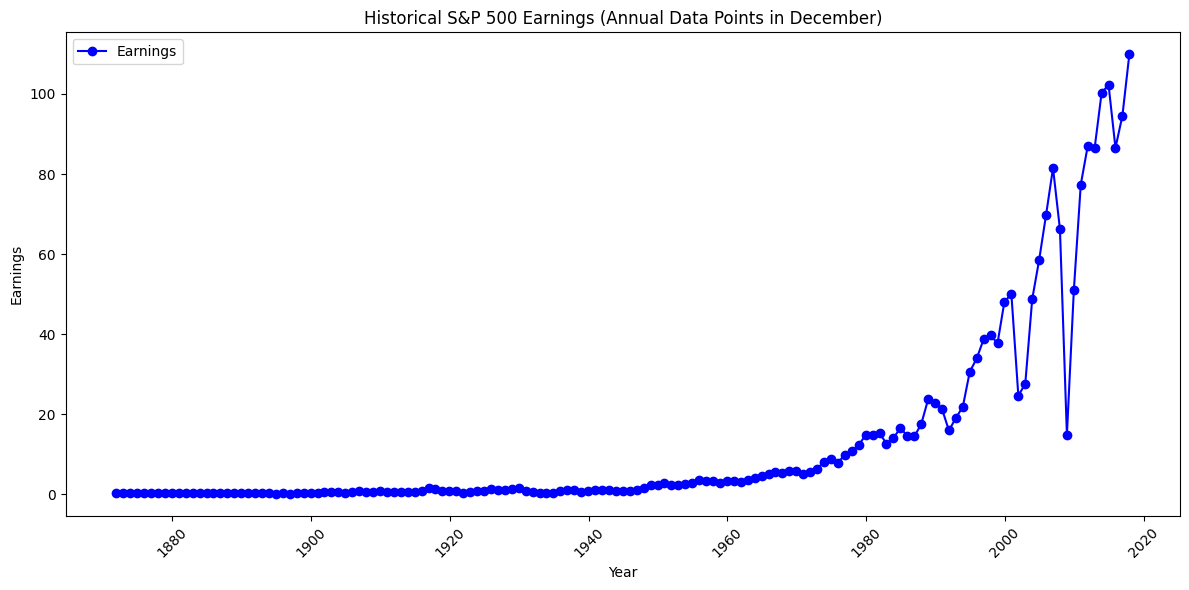

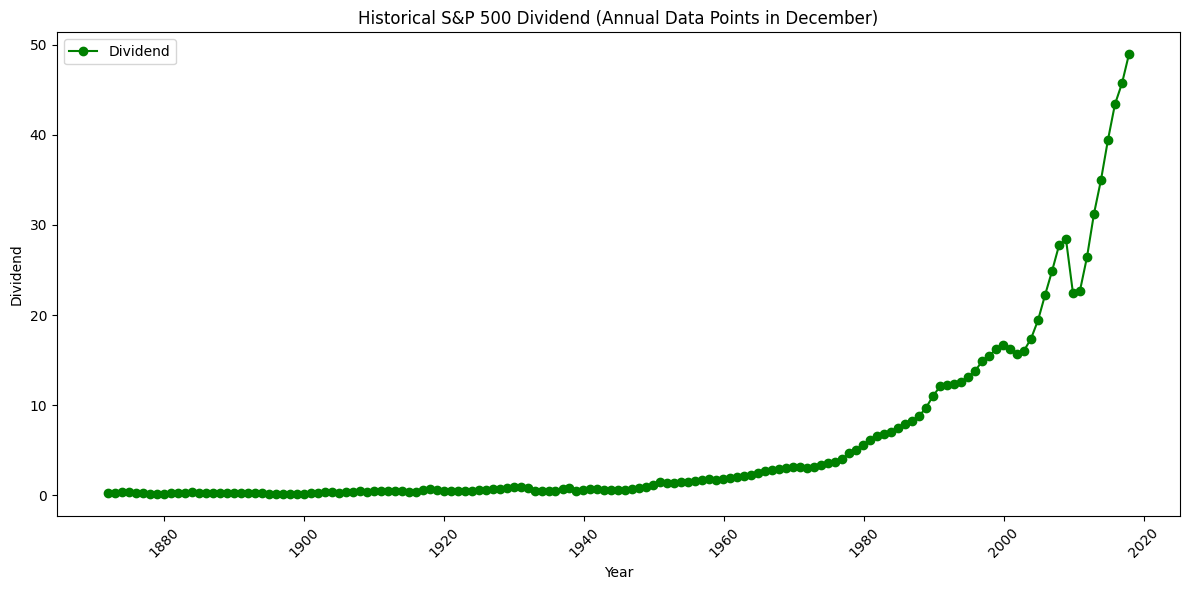

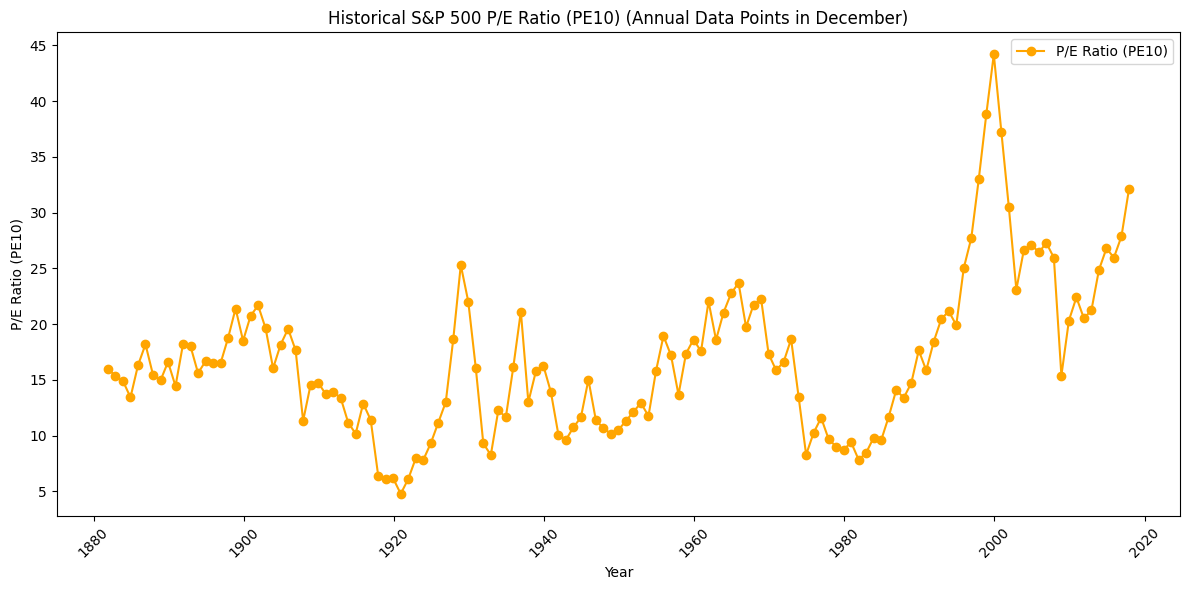

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(december_data['Date'], december_data['Earnings'], label='Earnings', marker='o', color='blue')
plt.title('Historical S&P 500 Earnings (Annual Data Points in December)')
plt.xlabel('Year')
plt.ylabel('Earnings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(december_data['Date'], december_data['Dividend'], label='Dividend', marker='o', color='green')
plt.title('Historical S&P 500 Dividend (Annual Data Points in December)')
plt.xlabel('Year')
plt.ylabel('Dividend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(december_data['Date'], december_data['PE10'], label='P/E Ratio (PE10)', marker='o', color='orange')
plt.title('Historical S&P 500 P/E Ratio (PE10) (Annual Data Points in December)')
plt.xlabel('Year')
plt.ylabel('P/E Ratio (PE10)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
## CPI and Interest Rate Impact 

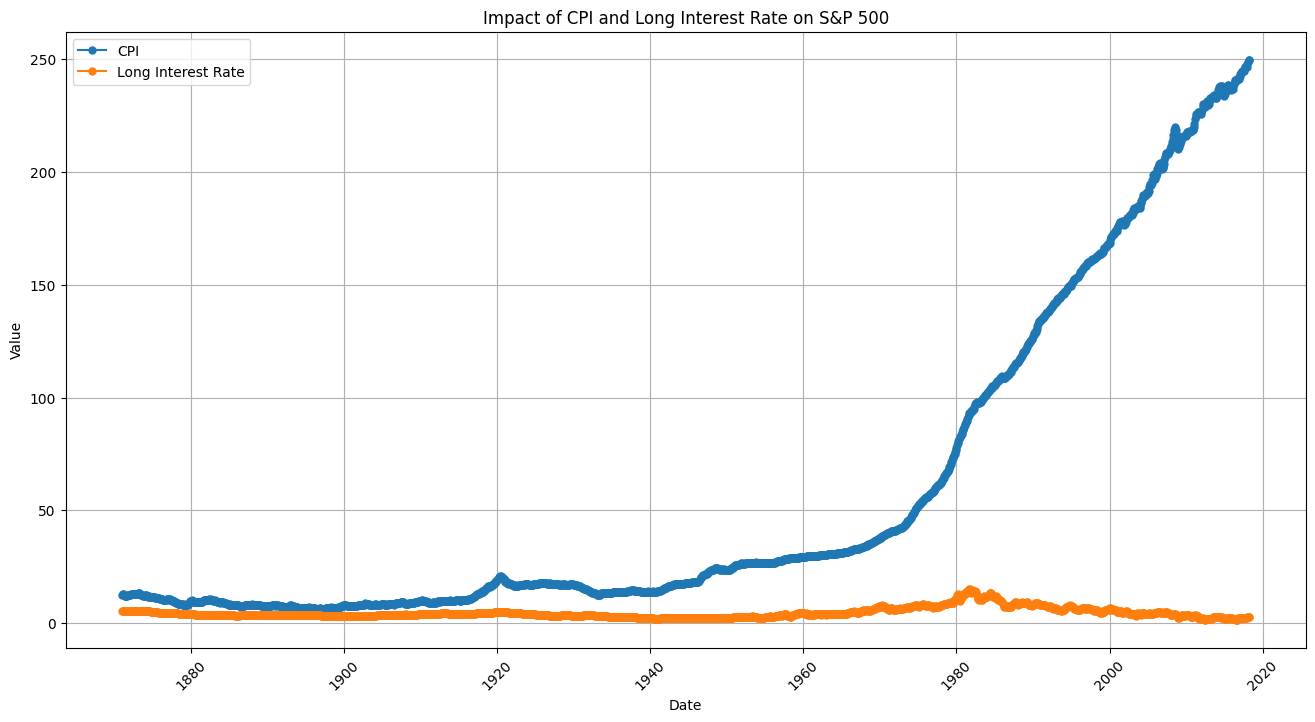

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(sp500_index_data['Date'], sp500_index_data['Consumer Price Index'], label='CPI', marker='o', linestyle='-', markersize=5)
plt.plot(sp500_index_data['Date'], sp500_index_data['Long Interest Rate'], label='Long Interest Rate', marker='o', linestyle='-', markersize=5)

plt.title('Impact of CPI and Long Interest Rate on S&P 500')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

In [37]:
sp500_index_data['Date'] = pd.to_datetime(sp500_index_data['Date'])

In [38]:
last_20_years_data = sp500_index_data[sp500_index_data['Date'] >= sp500_index_data['Date'].max() - pd.DateOffset(years=20)]

In [39]:
last_20_years_data.loc[:, 'CPI_Pct_Change'] = last_20_years_data['Consumer Price Index'].pct_change() * 100
last_20_years_data.loc[:, 'Interest_Rate_Pct_Change'] = last_20_years_data['Long Interest Rate'].pct_change() * 100

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_9140/2861083358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_years_data.loc[:, 'CPI_Pct_Change'] = last_20_years_data['Consumer Price Index'].pct_change() * 100
/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_9140/2861083358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_years_data.loc[:, 'Interest_Rate_Pct_Change'] = last_20_years_data['Long Interest Rate'].pct_change() * 100


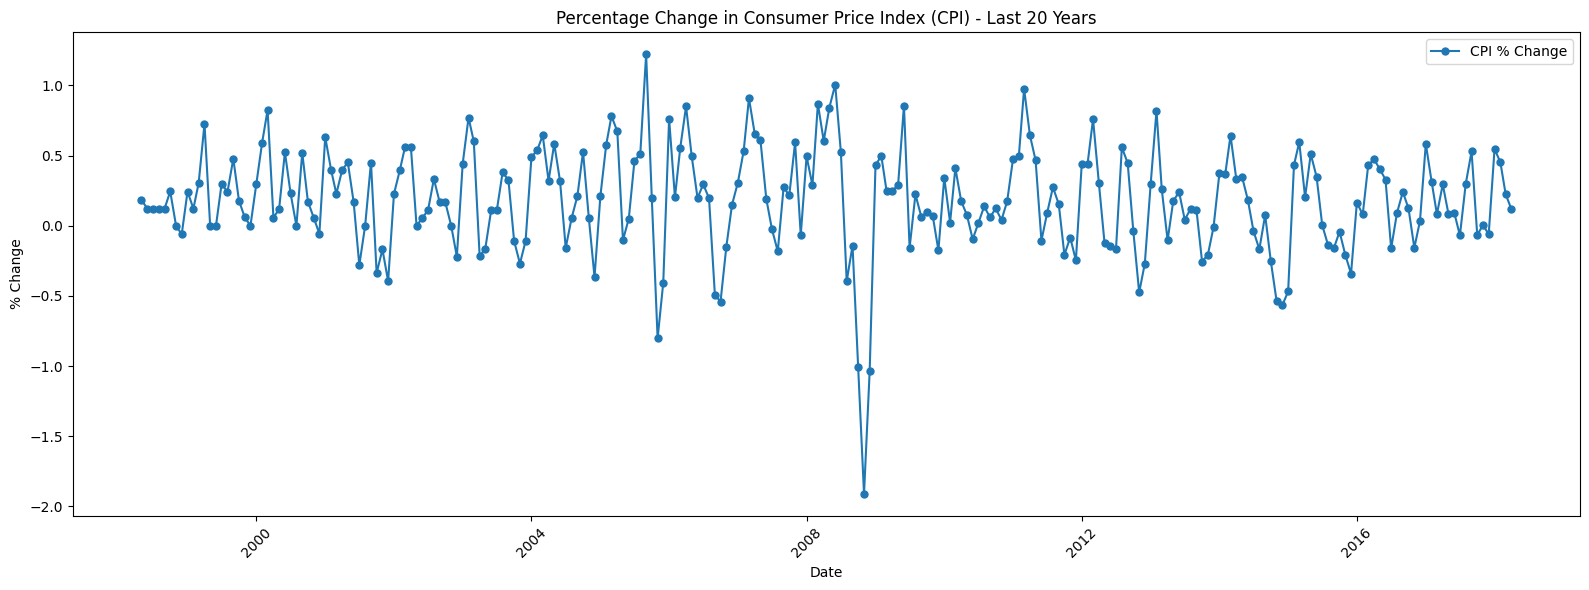

In [40]:
plt.figure(figsize=(16, 6))
plt.plot(last_20_years_data['Date'], last_20_years_data['CPI_Pct_Change'], label='CPI % Change', marker='o', linestyle='-', markersize=5)
plt.title('Percentage Change in Consumer Price Index (CPI) - Last 20 Years')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

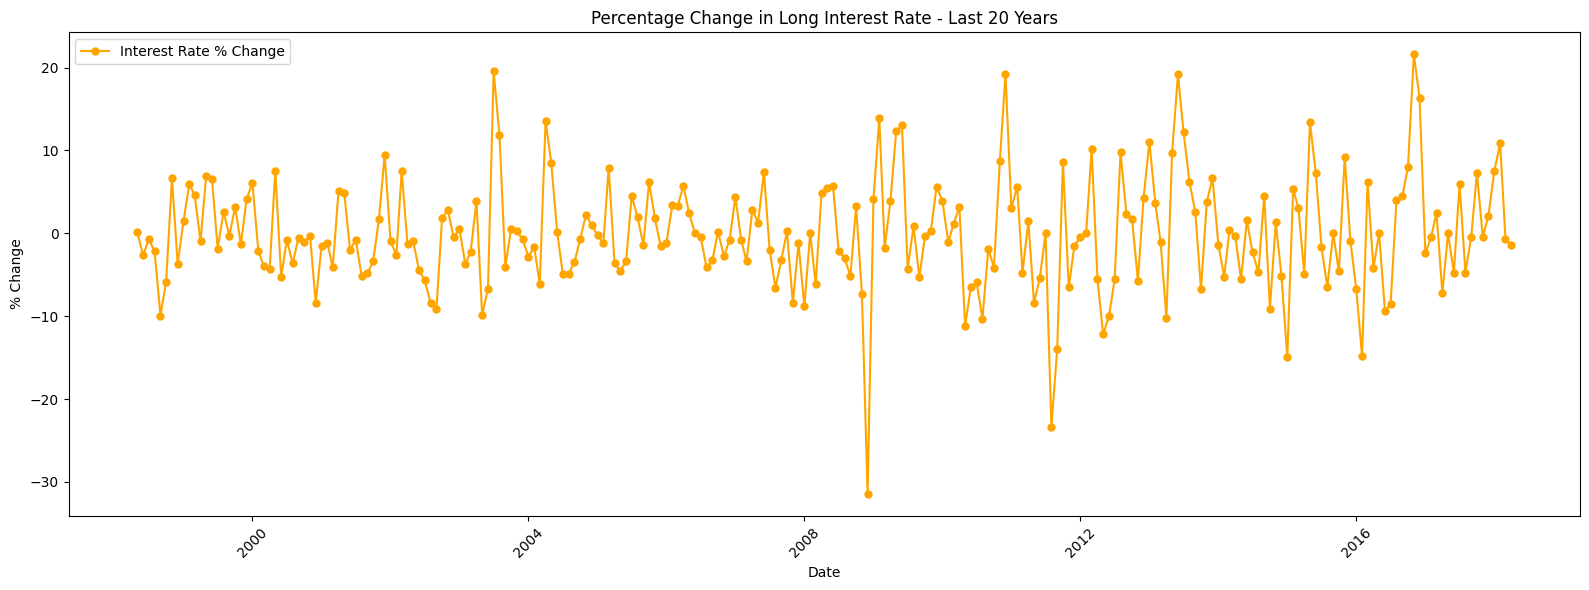

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(last_20_years_data['Date'], last_20_years_data['Interest_Rate_Pct_Change'], label='Interest Rate % Change', marker='o', linestyle='-', markersize=5, color='orange')
plt.title('Percentage Change in Long Interest Rate - Last 20 Years')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
##  PE10 Analysis 

In [43]:
pe10_data = sp500_index_data[['Date', 'PE10']].copy()
pe10_data['Date'] = pd.to_datetime(pe10_data['Date'])

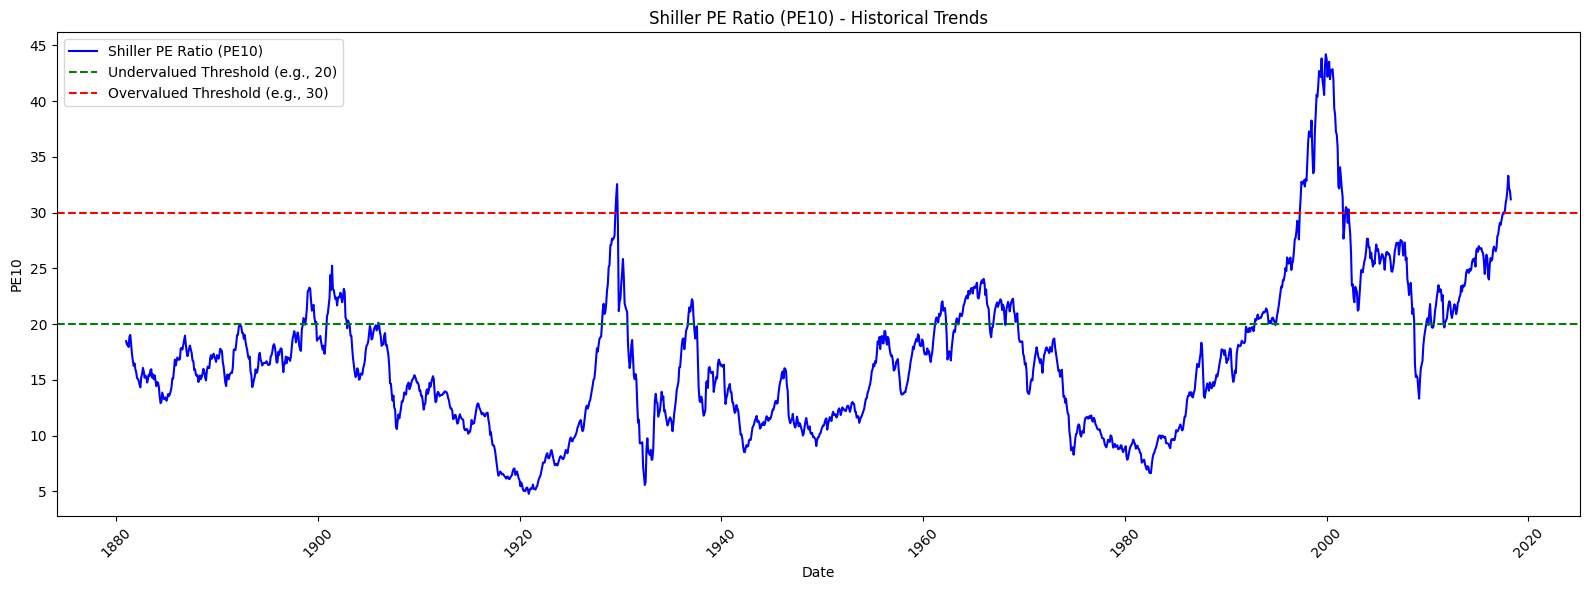

In [44]:
plt.figure(figsize=(16, 6))
plt.plot(pe10_data['Date'], pe10_data['PE10'], label='Shiller PE Ratio (PE10)', color='blue')
plt.title('Shiller PE Ratio (PE10) - Historical Trends')
plt.xlabel('Date')
plt.ylabel('PE10')
plt.axhline(y=20, color='green', linestyle='--', label='Undervalued Threshold (e.g., 20)')
plt.axhline(y=30, color='red', linestyle='--', label='Overvalued Threshold (e.g., 30)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()